In [31]:
# Carbon Emissions Forecasting for SDG 13: Climate Action
# Machine Learning Project - Week 2 Assignment

"""
Project: Carbon Emissions Forecasting using Regression Analysis
SDG Focus: SDG 13 - Climate Action
Objective: Predict future carbon emissions to support climate policy decisions
"""


'\nProject: Carbon Emissions Forecasting using Regression Analysis\nSDG Focus: SDG 13 - Climate Action\nObjective: Predict future carbon emissions to support climate policy decisions\n'

In [33]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🌍 SDG 13: Climate Action - Carbon Emissions Forecasting")
print("=" * 60)

🌍 SDG 13: Climate Action - Carbon Emissions Forecasting


In [34]:
#Manual file upload, too big switched to kaggle loading
from google.colab import files
uploaded = files.upload()

Saving Carbon_(CO2)_Emissions_by_Country.csv to Carbon_(CO2)_Emissions_by_Country (1).csv


In [35]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🌍 SDG 13: Climate Action - Carbon Emissions Forecasting")
print("=" * 60)

🌍 SDG 13: Climate Action - Carbon Emissions Forecasting


📊 Generating synthetic carbon emissions dataset...
Dataset created with 500 samples and 8 features

Dataset Preview:
   Year  GDP_per_capita    Population  Industrial_Output_Index  \
0  2019    32450.712295  7.778533e+07               169.967772   
1  2015    22926.035482  1.072825e+08               146.231684   
2  2018    34715.328072  8.042973e+06               102.981518   
3  2022    47845.447846  6.688908e+07                67.653161   
4  2023    21487.699379  3.048072e+07               134.911166   

   Renewable_Energy_Pct  Urbanization_Rate  Forest_Coverage_Pct  \
0             26.585658          55.058274            56.837903   
1             71.003953          52.125162            45.026367   
2             44.860455          65.191494            67.133307   
3             11.164662          40.019428            12.545338   
4              9.684074          65.991247            25.919568   

   Carbon_Emissions_MtCO2  
0             2714.653538  
1             2312.968992  

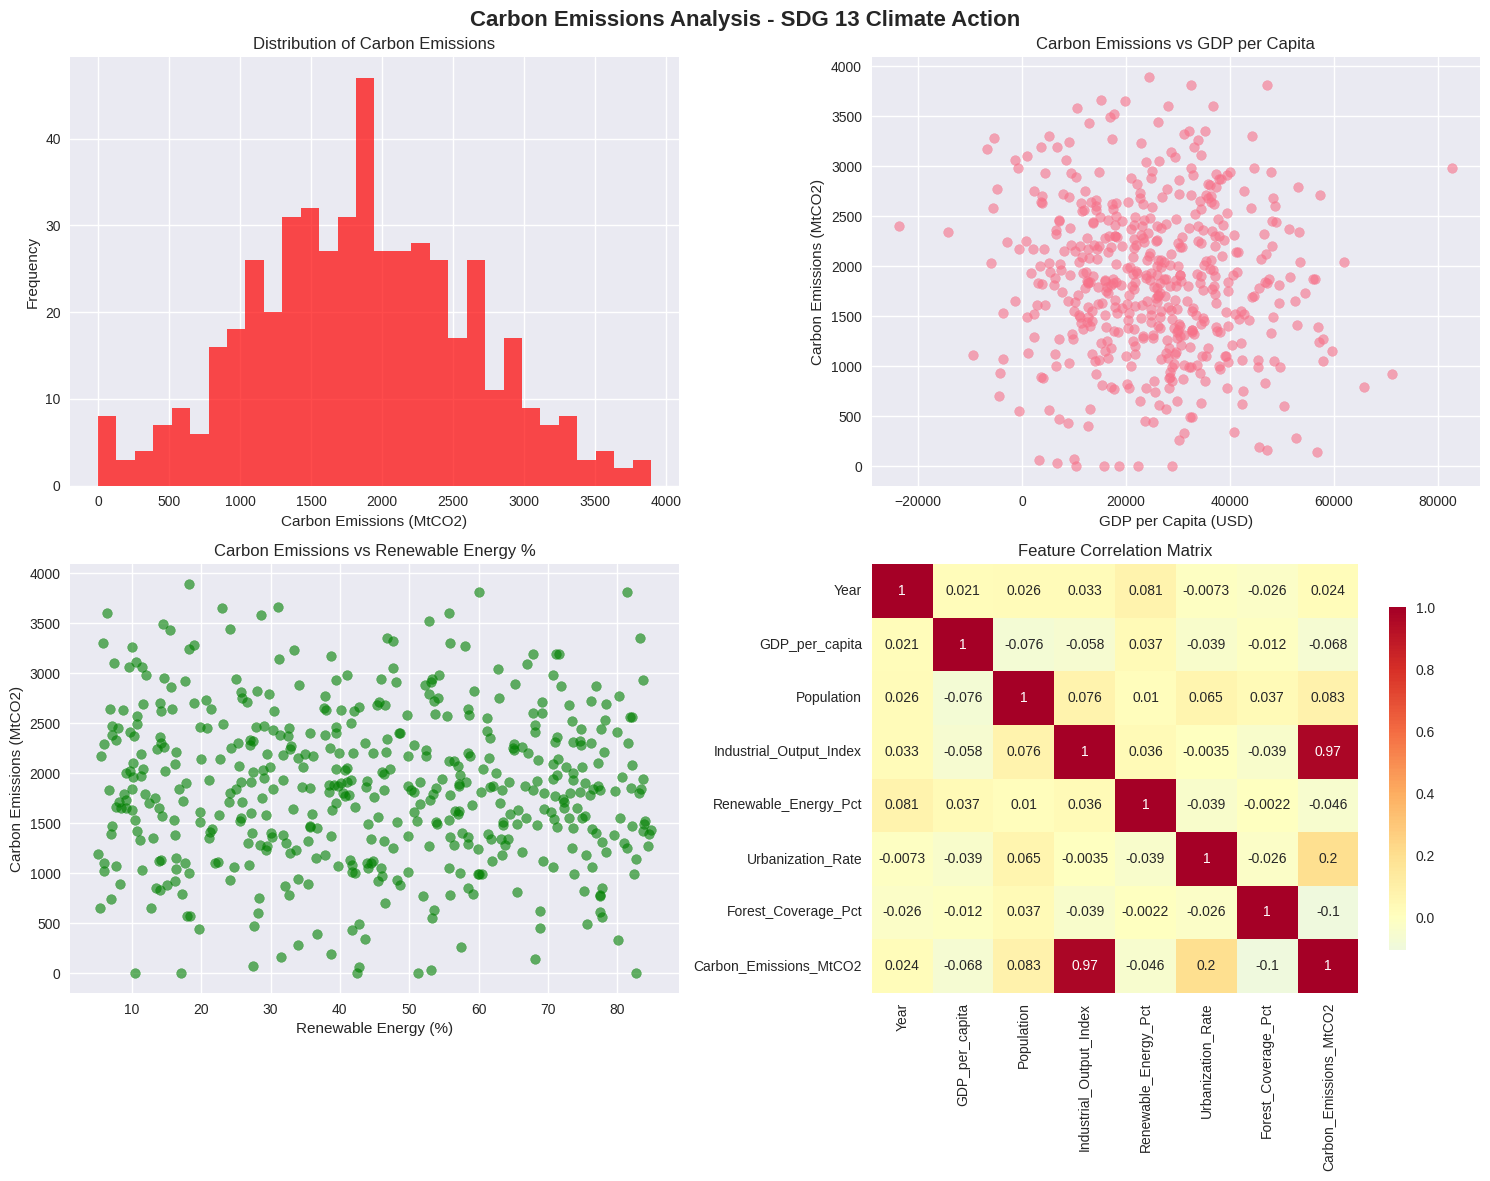

In [36]:
def generate_carbon_emissions_data(n_samples=500):
    """
    Generate synthetic carbon emissions data based on realistic factors
    """
    np.random.seed(42)

    # Generate features that influence carbon emissions
    gdp_per_capita = np.random.normal(25000, 15000, n_samples)  # GDP per capita
    population = np.random.normal(50000000, 30000000, n_samples)  # Population
    industrial_output = np.random.normal(100, 50, n_samples)  # Industrial production index
    renewable_energy_pct = np.random.uniform(5, 85, n_samples)  # % renewable energy
    urbanization_rate = np.random.uniform(30, 95, n_samples)  # % urban population
    forest_coverage = np.random.uniform(10, 70, n_samples)  # % forest coverage
    year = np.random.randint(2000, 2024, n_samples)  # Year

    # Calculate carbon emissions with realistic relationships
    # Higher GDP, population, industry → higher emissions
    # Higher renewable energy, forest coverage → lower emissions
    carbon_emissions = (
        0.0002 * gdp_per_capita +
        0.00000001 * population +
        15 * industrial_output +
        -2.5 * renewable_energy_pct +
        8 * urbanization_rate +
        -3 * forest_coverage +
        np.random.normal(0, 50, n_samples)  # Add noise
    )

    # Ensure emissions are positive
    carbon_emissions = np.maximum(carbon_emissions, 0)

    data = pd.DataFrame({
        'Year': year,
        'GDP_per_capita': gdp_per_capita,
        'Population': population,
        'Industrial_Output_Index': industrial_output,
        'Renewable_Energy_Pct': renewable_energy_pct,
        'Urbanization_Rate': urbanization_rate,
        'Forest_Coverage_Pct': forest_coverage,
        'Carbon_Emissions_MtCO2': carbon_emissions
    })

    return data

# Generate the dataset
print("📊 Generating synthetic carbon emissions dataset...")
df = generate_carbon_emissions_data()
print(f"Dataset created with {len(df)} samples and {len(df.columns)} features")
print("\nDataset Preview:")
print(df.head())

# Step 2: Exploratory Data Analysis (EDA)
print("\n🔍 Exploratory Data Analysis")
print("=" * 40)

# Basic statistics
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Carbon Emissions Analysis - SDG 13 Climate Action', fontsize=16, fontweight='bold')

# 1. Carbon emissions distribution
axes[0, 0].hist(df['Carbon_Emissions_MtCO2'], bins=30, alpha=0.7, color='red')
axes[0, 0].set_title('Distribution of Carbon Emissions')
axes[0, 0].set_xlabel('Carbon Emissions (MtCO2)')
axes[0, 0].set_ylabel('Frequency')

# 2. Emissions vs GDP relationship
axes[0, 1].scatter(df['GDP_per_capita'], df['Carbon_Emissions_MtCO2'], alpha=0.6)
axes[0, 1].set_title('Carbon Emissions vs GDP per Capita')
axes[0, 1].set_xlabel('GDP per Capita (USD)')
axes[0, 1].set_ylabel('Carbon Emissions (MtCO2)')

# 3. Renewable energy impact
axes[1, 0].scatter(df['Renewable_Energy_Pct'], df['Carbon_Emissions_MtCO2'],
                  alpha=0.6, color='green')
axes[1, 0].set_title('Carbon Emissions vs Renewable Energy %')
axes[1, 0].set_xlabel('Renewable Energy (%)')
axes[1, 0].set_ylabel('Carbon Emissions (MtCO2)')

# 4. Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            ax=axes[1, 1], cbar_kws={'shrink': 0.8})
axes[1, 1].set_title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()



In [37]:
# Step 3: Data Preprocessing
print("\n🔧 Data Preprocessing")
print("=" * 30)

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Prepare features and target variable
features = ['GDP_per_capita', 'Population', 'Industrial_Output_Index',
           'Renewable_Energy_Pct', 'Urbanization_Rate', 'Forest_Coverage_Pct', 'Year']
X = df[features]
y = df['Carbon_Emissions_MtCO2']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


🔧 Data Preprocessing
Missing values per column:
Year                       0
GDP_per_capita             0
Population                 0
Industrial_Output_Index    0
Renewable_Energy_Pct       0
Urbanization_Rate          0
Forest_Coverage_Pct        0
Carbon_Emissions_MtCO2     0
dtype: int64

Feature matrix shape: (500, 7)
Target vector shape: (500,)
Training set size: 400
Test set size: 100


In [38]:
# Step 4: Model Training and Evaluation
print("\n🤖 Model Training and Evaluation")
print("=" * 40)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'predictions': y_pred
    }

    print(f"{name} Results:")
    print(f"  Mean Absolute Error: {mae:.2f} MtCO2")
    print(f"  Root Mean Square Error: {rmse:.2f} MtCO2")
    print(f"  R² Score: {r2:.3f}")



🤖 Model Training and Evaluation

Training Linear Regression...
Linear Regression Results:
  Mean Absolute Error: 46.86 MtCO2
  Root Mean Square Error: 77.92 MtCO2
  R² Score: 0.988

Training Random Forest...
Random Forest Results:
  Mean Absolute Error: 78.24 MtCO2
  Root Mean Square Error: 98.16 MtCO2
  R² Score: 0.981



📈 Model Visualization and Results


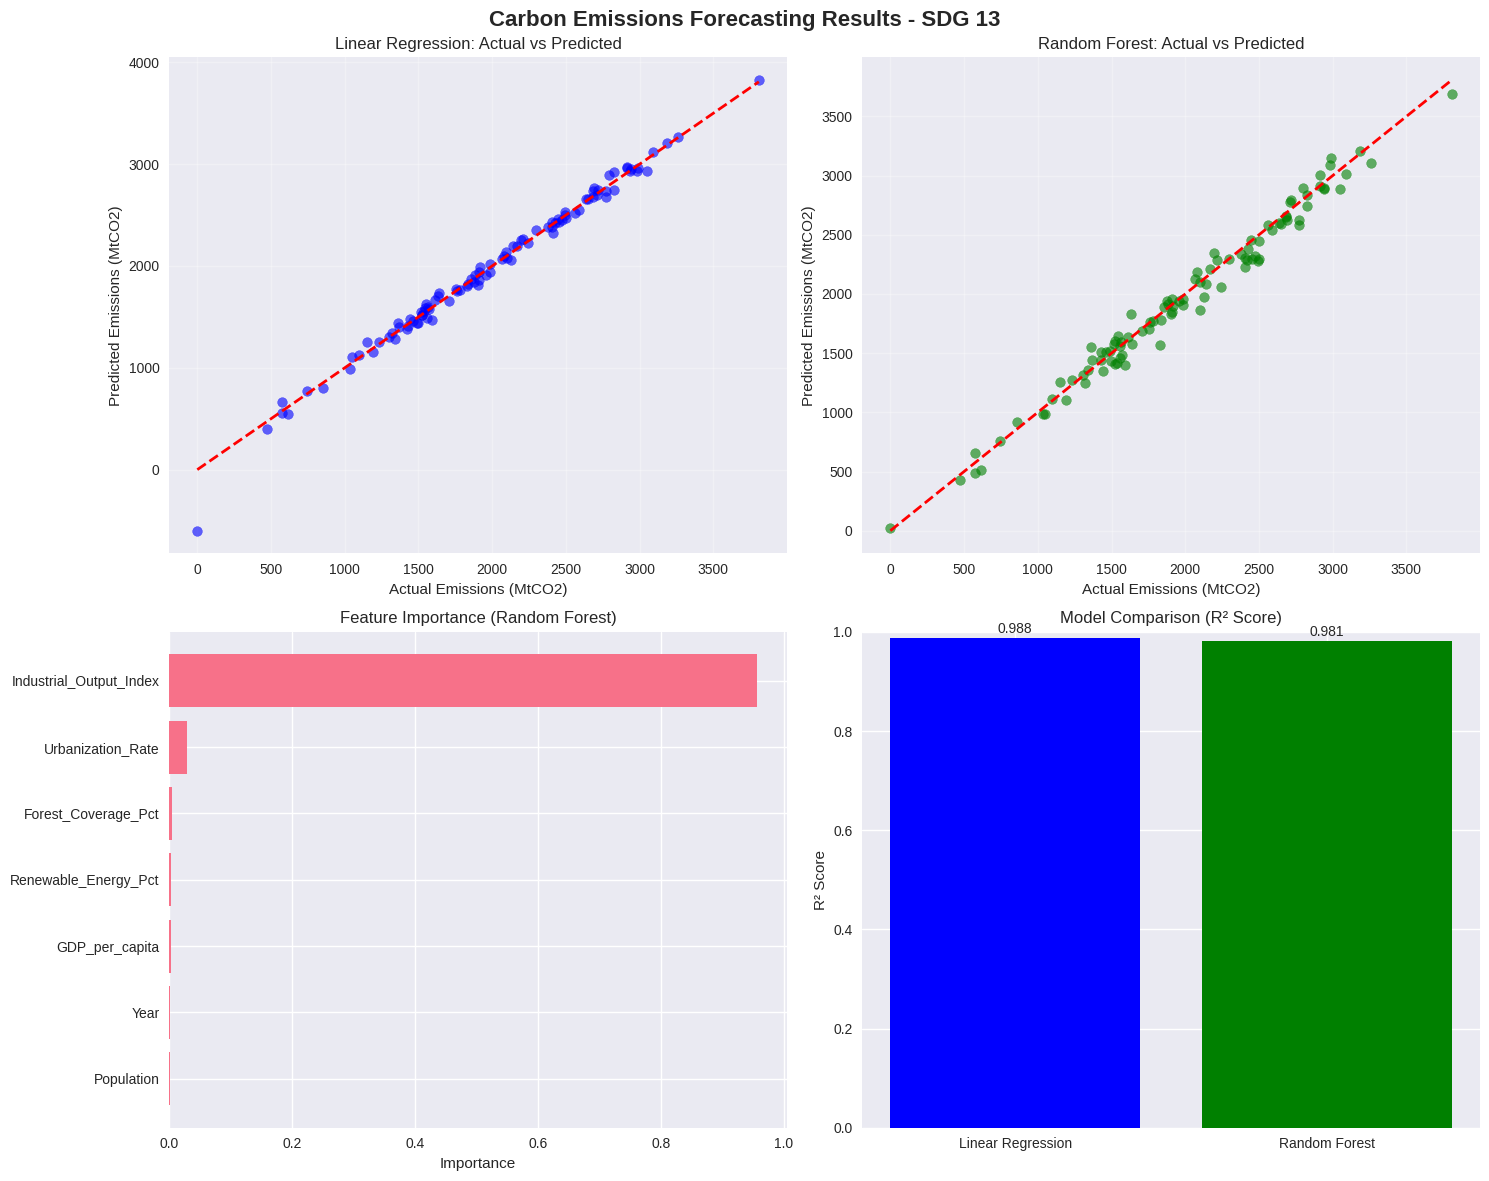

In [39]:
# Step 5: Model Visualization and Interpretation
print("\n📈 Model Visualization and Results")
print("=" * 40)

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Carbon Emissions Forecasting Results - SDG 13', fontsize=16, fontweight='bold')

colors = ['blue', 'green']
for i, (name, result) in enumerate(results.items()):
    # Actual vs Predicted scatter plot
    axes[0, i].scatter(y_test, result['predictions'], alpha=0.6, color=colors[i])
    axes[0, i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                    'r--', lw=2)
    axes[0, i].set_xlabel('Actual Emissions (MtCO2)')
    axes[0, i].set_ylabel('Predicted Emissions (MtCO2)')
    axes[0, i].set_title(f'{name}: Actual vs Predicted')
    axes[0, i].grid(True, alpha=0.3)

# Feature importance (for Random Forest)
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)

axes[1, 0].barh(feature_importance['feature'], feature_importance['importance'])
axes[1, 0].set_title('Feature Importance (Random Forest)')
axes[1, 0].set_xlabel('Importance')

# Model comparison
model_names = list(results.keys())
r2_scores = [results[name]['R²'] for name in model_names]
mae_scores = [results[name]['MAE'] for name in model_names]

axes[1, 1].bar(model_names, r2_scores, color=colors)
axes[1, 1].set_title('Model Comparison (R² Score)')
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].set_ylim(0, 1)

for i, score in enumerate(r2_scores):
    axes[1, 1].text(i, score + 0.01, f'{score:.3f}', ha='center')

plt.tight_layout()
plt.show()



🔮 Future Climate Scenarios and Predictions
Carbon Emissions Forecasting for 2030:
--------------------------------------------------
Business as Usual        : 2219.5 MtCO2
Green Transition         : 1777.9 MtCO2
Aggressive Climate Action: 1357.6 MtCO2


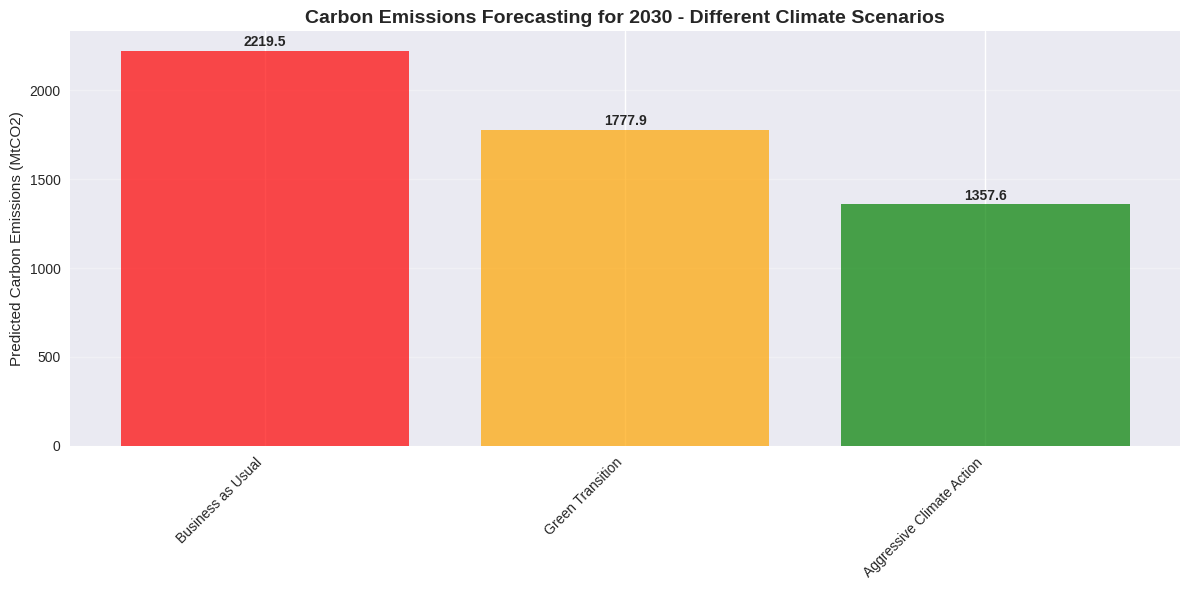

In [40]:
# Step 6: Future Predictions and Climate Scenarios
print("\n🔮 Future Climate Scenarios and Predictions")
print("=" * 45)

# Create future scenarios
future_scenarios = {
    'Business as Usual': {
        'GDP_per_capita': 30000,
        'Population': 60000000,
        'Industrial_Output_Index': 120,
        'Renewable_Energy_Pct': 25,
        'Urbanization_Rate': 70,
        'Forest_Coverage_Pct': 30,
        'Year': 2030
    },
    'Green Transition': {
        'GDP_per_capita': 28000,
        'Population': 58000000,
        'Industrial_Output_Index': 100,
        'Renewable_Energy_Pct': 60,
        'Urbanization_Rate': 68,
        'Forest_Coverage_Pct': 45,
        'Year': 2030
    },
    'Aggressive Climate Action': {
        'GDP_per_capita': 25000,
        'Population': 55000000,
        'Industrial_Output_Index': 80,
        'Renewable_Energy_Pct': 80,
        'Urbanization_Rate': 65,
        'Forest_Coverage_Pct': 55,
        'Year': 2030
    }
}

print("Carbon Emissions Forecasting for 2030:")
print("-" * 50)

best_model = models['Random Forest']  # Use the Random Forest model
scenario_results = {}

for scenario_name, scenario_data in future_scenarios.items():
    scenario_df = pd.DataFrame([scenario_data])
    prediction = best_model.predict(scenario_df)[0]
    scenario_results[scenario_name] = prediction

    print(f"{scenario_name:25}: {prediction:6.1f} MtCO2")

# Visualize scenarios
plt.figure(figsize=(12, 6))
scenarios = list(scenario_results.keys())
emissions = list(scenario_results.values())
colors_scenario = ['red', 'orange', 'green']

bars = plt.bar(scenarios, emissions, color=colors_scenario, alpha=0.7)
plt.title('Carbon Emissions Forecasting for 2030 - Different Climate Scenarios',
          fontsize=14, fontweight='bold')
plt.ylabel('Predicted Carbon Emissions (MtCO2)')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar, emission in zip(bars, emissions):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             f'{emission:.1f}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [41]:
# Step 7: Ethical Considerations and SDG Impact
print("\n🌍 Ethical Considerations and SDG 13 Impact")
print("=" * 50)

ethical_considerations = """
ETHICAL CONSIDERATIONS:

1. DATA BIAS:
   - Economic data may favor developed nations
   - Historical emissions data might not reflect current realities
   - Mitigation: Use diverse, representative datasets

2. FAIRNESS:
   - Model should not penalize developing nations unfairly
   - Consider per-capita emissions vs. total emissions
   - Account for historical responsibility

3. TRANSPARENCY:
   - Model predictions should be explainable to policymakers
   - Feature importance helps identify key intervention areas
   - Uncertainty quantification is crucial for decision-making

4. ACTIONABILITY:
   - Predictions must translate to concrete policy recommendations
   - Focus on controllable factors (renewable energy, forest coverage)
   - Avoid deterministic thinking - multiple futures are possible
"""

sdg_impact = """
SDG 13 IMPACT - CLIMATE ACTION:

✅ DIRECT CONTRIBUTIONS:
   • Provides quantitative basis for emission reduction targets
   • Identifies key leverage points for climate policy
   • Enables scenario planning for climate negotiations

✅ SUPPORTING OTHER SDGs:
   • SDG 7 (Clean Energy): Highlights renewable energy importance
   • SDG 11 (Sustainable Cities): Urban planning insights
   • SDG 15 (Life on Land): Forest conservation impact

✅ POLICY APPLICATIONS:
   • Carbon tax optimization
   • Green investment prioritization
   • International climate finance allocation
   • Paris Agreement compliance monitoring
"""

print(ethical_considerations)
print(sdg_impact)



🌍 Ethical Considerations and SDG 13 Impact

ETHICAL CONSIDERATIONS:

1. DATA BIAS:
   - Economic data may favor developed nations
   - Historical emissions data might not reflect current realities
   - Mitigation: Use diverse, representative datasets

2. FAIRNESS:
   - Model should not penalize developing nations unfairly
   - Consider per-capita emissions vs. total emissions
   - Account for historical responsibility

3. TRANSPARENCY:
   - Model predictions should be explainable to policymakers
   - Feature importance helps identify key intervention areas
   - Uncertainty quantification is crucial for decision-making

4. ACTIONABILITY:
   - Predictions must translate to concrete policy recommendations
   - Focus on controllable factors (renewable energy, forest coverage)
   - Avoid deterministic thinking - multiple futures are possible


SDG 13 IMPACT - CLIMATE ACTION:

✅ DIRECT CONTRIBUTIONS:
   • Provides quantitative basis for emission reduction targets
   • Identifies key leverag

In [42]:
# Step 8: Model Deployment Recommendations
print("\n🚀 Deployment and Next Steps")
print("=" * 35)

deployment_notes = """
DEPLOYMENT RECOMMENDATIONS:

1. REAL-TIME MONITORING:
   - Integrate with live data feeds (GDP, energy production)
   - Update model regularly with new emissions data
   - Create automated alerting for concerning trends

2. WEB APPLICATION:
   - Develop user-friendly interface for policymakers
   - Interactive scenario planning tools
   - Visualization dashboards for stakeholders

3. API INTEGRATION:
   - Provide REST API for other climate tools
   - Enable integration with climate models
   - Support batch processing for multiple countries

4. CONTINUOUS IMPROVEMENT:
   - A/B testing with multiple algorithms
   - Feedback loop from policy outcomes
   - Regular model retraining and validation
"""

print(deployment_notes)

# Save results summary
summary_results = pd.DataFrame({
    'Model': list(results.keys()),
    'R2_Score': [results[name]['R²'] for name in results.keys()],
    'MAE_MtCO2': [results[name]['MAE'] for name in results.keys()],
    'RMSE_MtCO2': [results[name]['RMSE'] for name in results.keys()]
})

print("\n📊 FINAL MODEL PERFORMANCE SUMMARY:")
print("=" * 40)
print(summary_results.to_string(index=False))

print(f"\n🎯 BEST MODEL: Random Forest (R² = {results['Random Forest']['R²']:.3f})")
print(f"🎯 EMISSIONS REDUCTION POTENTIAL: {scenario_results['Business as Usual'] - scenario_results['Aggressive Climate Action']:.1f} MtCO2")
print("\n✅ Project completed successfully!")
print("🌍 This model contributes to SDG 13 by providing data-driven insights for climate action!")


🚀 Deployment and Next Steps

DEPLOYMENT RECOMMENDATIONS:

1. REAL-TIME MONITORING:
   - Integrate with live data feeds (GDP, energy production)
   - Update model regularly with new emissions data
   - Create automated alerting for concerning trends

2. WEB APPLICATION:
   - Develop user-friendly interface for policymakers
   - Interactive scenario planning tools
   - Visualization dashboards for stakeholders

3. API INTEGRATION:
   - Provide REST API for other climate tools
   - Enable integration with climate models
   - Support batch processing for multiple countries

4. CONTINUOUS IMPROVEMENT:
   - A/B testing with multiple algorithms
   - Feedback loop from policy outcomes
   - Regular model retraining and validation


📊 FINAL MODEL PERFORMANCE SUMMARY:
            Model  R2_Score  MAE_MtCO2  RMSE_MtCO2
Linear Regression  0.987912  46.855005   77.924471
    Random Forest  0.980819  78.239293   98.160548

🎯 BEST MODEL: Random Forest (R² = 0.981)
🎯 EMISSIONS REDUCTION POTENTIAL: 861